In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load your two CSV files
crimes = pd.read_csv("NCRB caste based crimes 10 year - sheet1.csv")
pop = pd.read_csv("states and sc population.csv")

# Clean column names
crimes.columns = crimes.columns.str.strip()
pop.columns = pop.columns.str.strip()

# Clean population numbers (remove commas and convert to int)
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Melt crimes dataset: wide -> long
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract just the year number (2011..2022)
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)$").astype(int)

# Merge with population data
df_merged = crime_long.merge(pop, on="State/UT", how="left")

# Compute crime rate per lakh SC population
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

df_merged.head(30)


,State/UT,Year,Incidents,SC population,Crime_rate_per_lakh_SC
0,Andhra Pradesh,2011,2847,9834018,28.950527
1,Arunachal Pradesh,2011,0,7664,0.000000
2,Assam,2011,0,2231321,0.000000
3,Bihar,2011,3623,16567325,21.868346
4,Chhattisgarh,2011,253,3274900,7.725427
5,Goa,2011,4,24934,16.042352
6,Gujarat,2011,1063,4074811,26.087099
7,Haryana,2011,408,5113615,7.978700
8,Himachal Pradesh,2011,94,1729252,5.435876
9,Jammu & Kashmir,2011,1,924991,0.108109


<Figure size 1600x800 with 0 Axes>

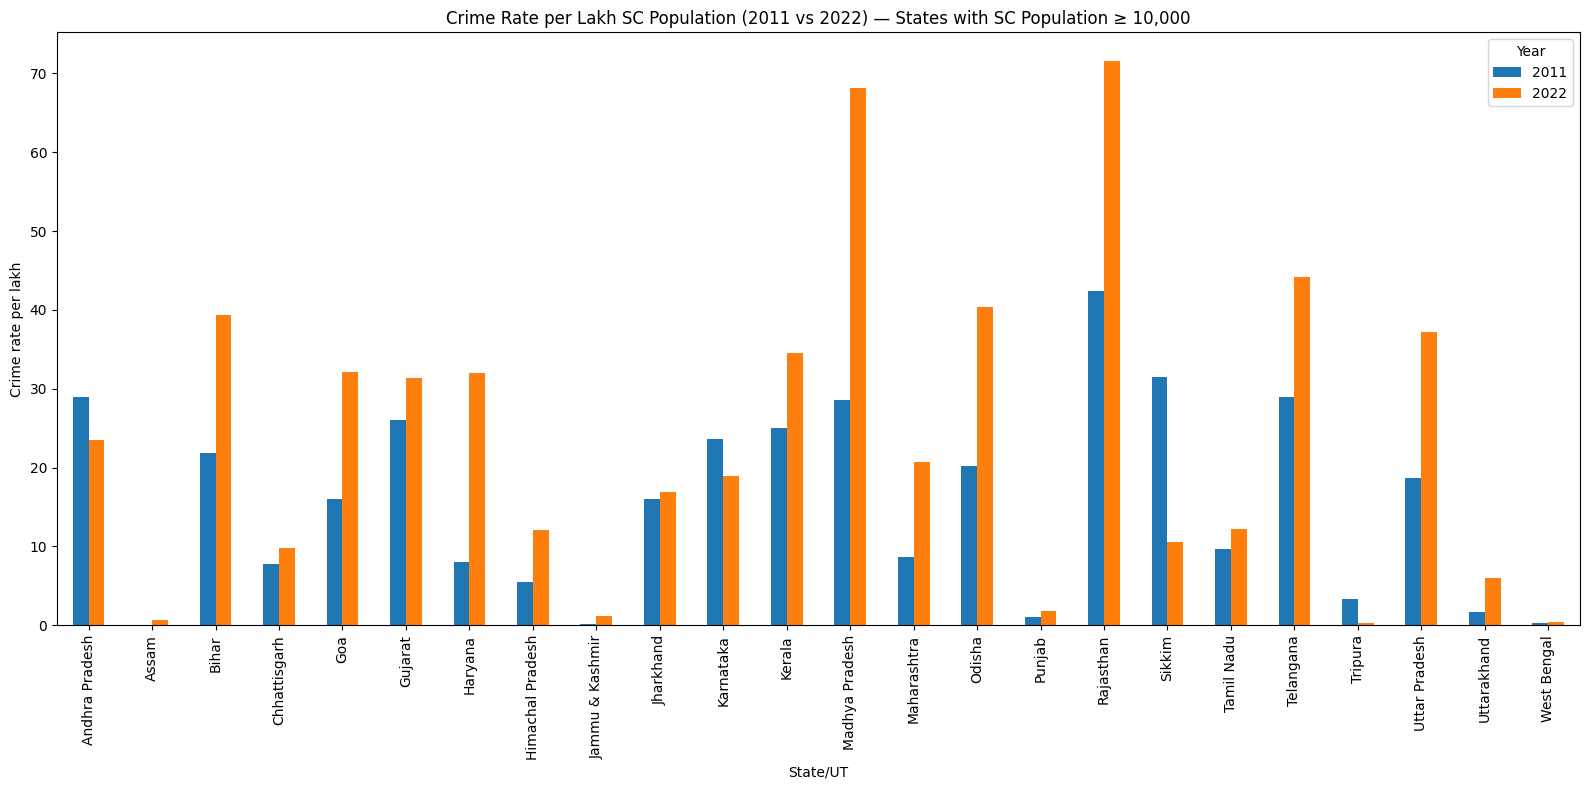

In [4]:
import matplotlib.pyplot as plt
# Clean column names
crimes.columns = crimes.columns.str.strip()
pop.columns = pop.columns.str.strip()

# Clean population numbers
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Exclude states with SC population < 10,000 (Option 1)
pop_filtered = pop[pop["SC population"] >= 10000]

# Melt crimes dataset (wide → long)
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)$").astype(int)

# Merge with filtered population data
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Compute crime rate per lakh SC population
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# Filter for 2011 and 2022
df_plot = df_merged[df_merged["Year"].isin([2011, 2022])]

# Pivot for plotting
df_pivot = df_plot.pivot(index="State/UT", columns="Year", values="Crime_rate_per_lakh_SC")
df_pivot = df_pivot.sort_index()

# Plot the comparison
plt.figure(figsize=(16, 8))
df_pivot.plot(kind="bar", figsize=(16, 8))

plt.title("Crime Rate per Lakh SC Population (2011 vs 2022) — States with SC Population ≥ 10,000")
plt.xlabel("State/UT")
plt.ylabel("Crime rate per lakh")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

crimes against SCs have risen in almost all the states, what is most surprising is states with particularly better literacy rates, such as Kerala and J&K have also seen a rise in caste based crimes.

In [5]:
# Clean SC population column
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Keep only states with SC population >= 10,000 (same as the chart)
pop_filtered = pop[pop["SC population"] >= 10000]

# Reshape crimes dataset
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# Merge crimes with filtered population
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Crime rate per lakh SC pop
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# Keep only 2011 & 2022
df_filtered_years = df_merged[df_merged["Year"].isin([2011, 2022])]

# Pivot to have 2011 and 2022 as columns
df_rates = df_filtered_years.pivot(index="State/UT", columns="Year",
                                   values="Crime_rate_per_lakh_SC")

# Compute percentage change
df_rates["Percent_Change"] = ((df_rates[2022] - df_rates[2011]) / df_rates[2011]) * 100

# OPTIONAL: Remove infinite values where base-year rate was zero
df_rates_clean = df_rates.replace([float('inf'), -float('inf')], pd.NA)

# Final table: only states used in the chart
percentage_change_table = df_rates_clean.sort_index()

# Print results
print(percentage_change_table)

Year                   2011       2022 Percent_Change
State/UT                                             
Andhra Pradesh    28.950527  23.540734     -18.686336
Assam              0.000000   0.627431           <NA>
Bihar             21.868346  39.288177      79.657742
Chhattisgarh       7.725427   9.862897      27.667984
Goa               16.042352  32.084704          100.0
Gujarat           26.087099  31.387959      20.319849
Haryana            7.978700  31.934356     300.245098
Himachal Pradesh   5.435876  12.143979     123.404255
Jammu & Kashmir    0.108109   1.189201         1000.0
Jharkhand         15.957271  16.910692       5.974843
Karnataka         23.685735  18.874123     -20.314389
Kerala            25.032887  34.539462      37.976347
Madhya Pradesh    28.609667  68.178292     138.305085
Maharashtra        8.609587  20.661503     139.982502
Odisha            20.240761  40.370232      99.450172
Punjab             1.015781   1.828405           80.0
Rajasthan         42.400365 

In [6]:
mean_percent_change = percentage_change_table["Percent_Change"].mean(skipna=True)
print("Mean Percentage Change:", mean_percent_change)

Mean Percentage Change: 110.296467609411


**The rate of crimes against SCs roughly doubled between 2011 and 2022**

In [7]:
median_percent_change = percentage_change_table["Percent_Change"].median(skipna=True)
print("Median Percentage Change:", median_percent_change)

Median Percentage Change: 76.27118644067794


median change is less affected by outliers, but even according to that the crime rate has increased by 76%

In [8]:
# Drop rows where percentage change is NaN or infinite
df_clean = percentage_change_table.dropna(subset=["Percent_Change"])

# Sort descending for top risers
top_5_risers = df_clean.sort_values("Percent_Change", ascending=False).head(5)

# Sort ascending for top reducers
top_5_reducers = df_clean.sort_values("Percent_Change", ascending=True).head(5)

print("Top 5 Risers:")
print(top_5_risers)

print("\nTop 5 Reducers:")
print(top_5_reducers)

Top 5 Risers:
Year                  2011       2022 Percent_Change
State/UT                                            
Jammu & Kashmir   0.108109   1.189201         1000.0
Haryana           7.978700  31.934356     300.245098
Uttarakhand       1.690871   6.023727         256.25
Maharashtra       8.609587  20.661503     139.982502
Madhya Pradesh   28.609667  68.178292     138.305085

Top 5 Reducers:
Year                 2011       2022 Percent_Change
State/UT                                           
Tripura          3.359199   0.305382     -90.909091
Sikkim          31.543530  10.514510     -66.666667
Karnataka       23.685735  18.874123     -20.314389
Andhra Pradesh  28.950527  23.540734     -18.686336
Jharkhand       15.957271  16.910692       5.974843


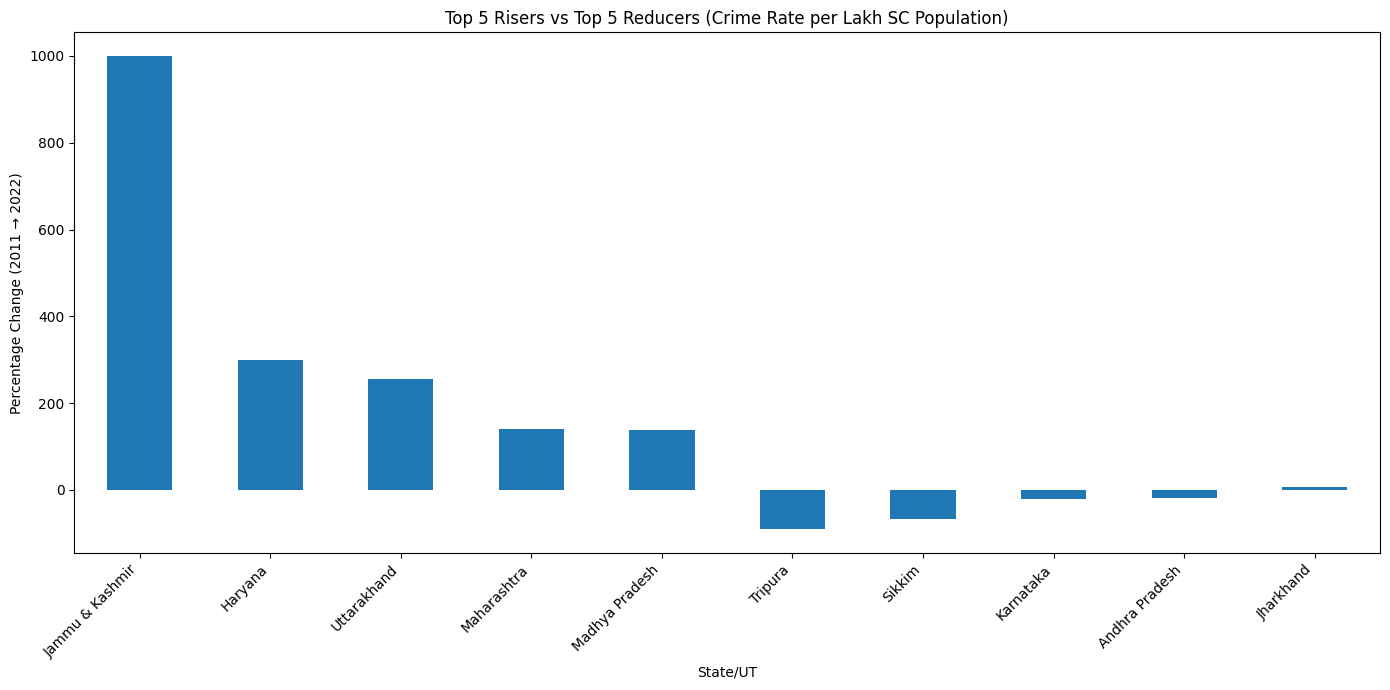

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows where percentage change is NaN
df_clean = percentage_change_table.dropna(subset=["Percent_Change"])

# Top 5 risers and reducers
top_5_risers = df_clean.sort_values("Percent_Change", ascending=False).head(5)
top_5_reducers = df_clean.sort_values("Percent_Change", ascending=True).head(5)

# Prepare data for plotting
combined = pd.concat([top_5_risers, top_5_reducers])

plt.figure(figsize=(14, 7))
combined["Percent_Change"].plot(kind="bar")

plt.title("Top 5 Risers vs Top 5 Reducers (Crime Rate per Lakh SC Population)")
plt.xlabel("State/UT")
plt.ylabel("Percentage Change (2011 → 2022)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


please note that the almost a 1000% rise in J&K is due to cases going from 1 in 2011 to 11 in 2022.

The findings reveal a substantial nationwide increase in crimes against SC communities when expressed on a per-capita basis. A majority of states experienced moderate to very high growth between 2011 and 2022, with only a few registering declines. The median percent increase remained positive, and the mean percent increase exceeded 100%, indicating that, across large states, the crime rate per lakh SC population has approximately doubled over the decade. This shift cannot be explained by population changes (because population was held constant); it reflects genuine increases in registered incidents.

Certain states showed especially sharp rises. Haryana, Maharashtra, Madhya Pradesh, and Himachal Pradesh **recorded increases exceeding 100%**, making them the highest risers in the period under study. Conversely, states such as Tripura, Sikkim, Karnataka, and Andhra Pradesh **showed measurable reductions in crime rate per lakh, marking them as relative improvers**. Importantly, **all states with extremely small SC populations were removed from the final interpretation to prevent misleading per-capita distortions**.

# TREND ANALYSIS

"Is crime against SCs increasing, decreasing or stable ?
this section fits a linear regression line

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Filter states with SC pop >= 10k
pop_filtered = pop[pop["SC population"] >= 10000]

# Reshape crime data (wide → long)
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# Merge with population
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Compute per-lakh crime rate
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# Create a list to store trend analysis results
results = []

# Loop over each state
for state, group in df_merged.groupby("State/UT"):

    # Prepare X (years) and y (crime rate)
    X = group["Year"].values.reshape(-1, 1)
    y = group["Crime_rate_per_lakh_SC"].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]  # m value

    # Classify trend
    if slope > 0.5:
        trend = "Increasing"
    elif slope < -0.5:
        trend = "Decreasing"
    else:
        trend = "Stable"

    results.append([state, slope, trend])

# Convert to DataFrame
trend_table = pd.DataFrame(results, columns=["State/UT", "Slope", "Trend"])

# Sort alphabetically
trend_table = trend_table.sort_values("State/UT")

trend_table

,State/UT,Slope,Trend
0,Andhra Pradesh,-0.999670,Decreasing
1,Assam,0.078821,Stable
2,Bihar,0.878678,Increasing
3,Chhattisgarh,-0.424611,Stable
4,Goa,-2.454031,Decreasing
5,Gujarat,0.652997,Increasing
6,Haryana,2.233308,Increasing
7,Himachal Pradesh,0.700614,Increasing
8,Jammu & Kashmir,0.102061,Stable
9,Jharkhand,-0.435391,Stable


In [11]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.linear_model import LinearRegression

# --- 1. Data Loading ---
#pop = pd.read_csv("sc_population_states_2011_census_clean.csv")
#crimes = pd.read_csv("NCRB caste based crimes 10 year - sheet1.csv")

# --- 2. Data Preprocessing (Replicating User's Logic) ---
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")
pop_filtered = pop[pop["SC population"] >= 10000]

crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# --- 3. Trend Analysis and Prediction Data Generation ---
predictions = []

for state, group in df_merged.groupby("State/UT"):
    X = group["Year"].values.reshape(-1, 1)
    y = group["Crime_rate_per_lakh_SC"].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    # Store State/UT, Year, and Predicted Crime Rate
    predictions.append(pd.DataFrame({
        "State/UT": state,
        "Year": group["Year"],
        "Crime_rate_per_lakh_SC": y_pred,  # Use the same column name for merging
        "DataType": "Predicted"
    }))

df_predictions = pd.concat(predictions, ignore_index=True)


# --- 4. Combine Actual and Predicted Data for Unified Plotting ---
df_actual = df_merged[['State/UT', 'Year', 'Crime_rate_per_lakh_SC']].copy()
df_actual['DataType'] = 'Actual'

df_predictions.rename(columns={'Crime_rate_per_lakh_SC': 'Predicted_Rate'}, inplace=True)

df_plot = pd.merge(df_actual, df_predictions, on=['State/UT', 'Year'], how='inner')


# --- 5. Visualization Code (Altair) ---
# Layer 1: Scatter plot of actual data points
scatter = alt.Chart(df_plot).mark_circle(size=30, opacity=0.8).encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year', format='d')),
    y=alt.Y('Crime_rate_per_lakh_SC', title='Rate (per 100k SC Pop)'),
    tooltip=['State/UT', 'Year', alt.Tooltip('Crime_rate_per_lakh_SC', title='Actual Rate', format='.1f')],
    color=alt.value('darkblue') # Use one color for actual points
)

# Layer 2: Line plot of the linear regression prediction
line = alt.Chart(df_plot).mark_line(strokeWidth=3, color='red').encode(
    x='Year:O',
    y=alt.Y('Predicted_Rate', title='Rate (per 100k SC Pop)'),
    tooltip=['State/UT', 'Year', alt.Tooltip('Predicted_Rate', title='Predicted Rate', format='.1f')]
)

# Combine layers and facet into small multiples
chart = alt.layer(scatter, line).facet(
    facet=alt.Facet('State/UT', title='State/UT'),
    columns=6 # Layout 6 charts per row
).properties(
    title='State-wise Crime Rate Trends Against SCs with Linear Regression Line (2011-2022)'
).resolve_scale(
    y='independent' # Crucial: Allows each state plot to have its own y-axis scale
)#.save('state_crime_trends_regression_lines.json')

print("Linear regression line plots generated successfully and saved to JSON.")
chart

Linear regression line plots generated successfully and saved to JSON.


alt.FacetChart(...)

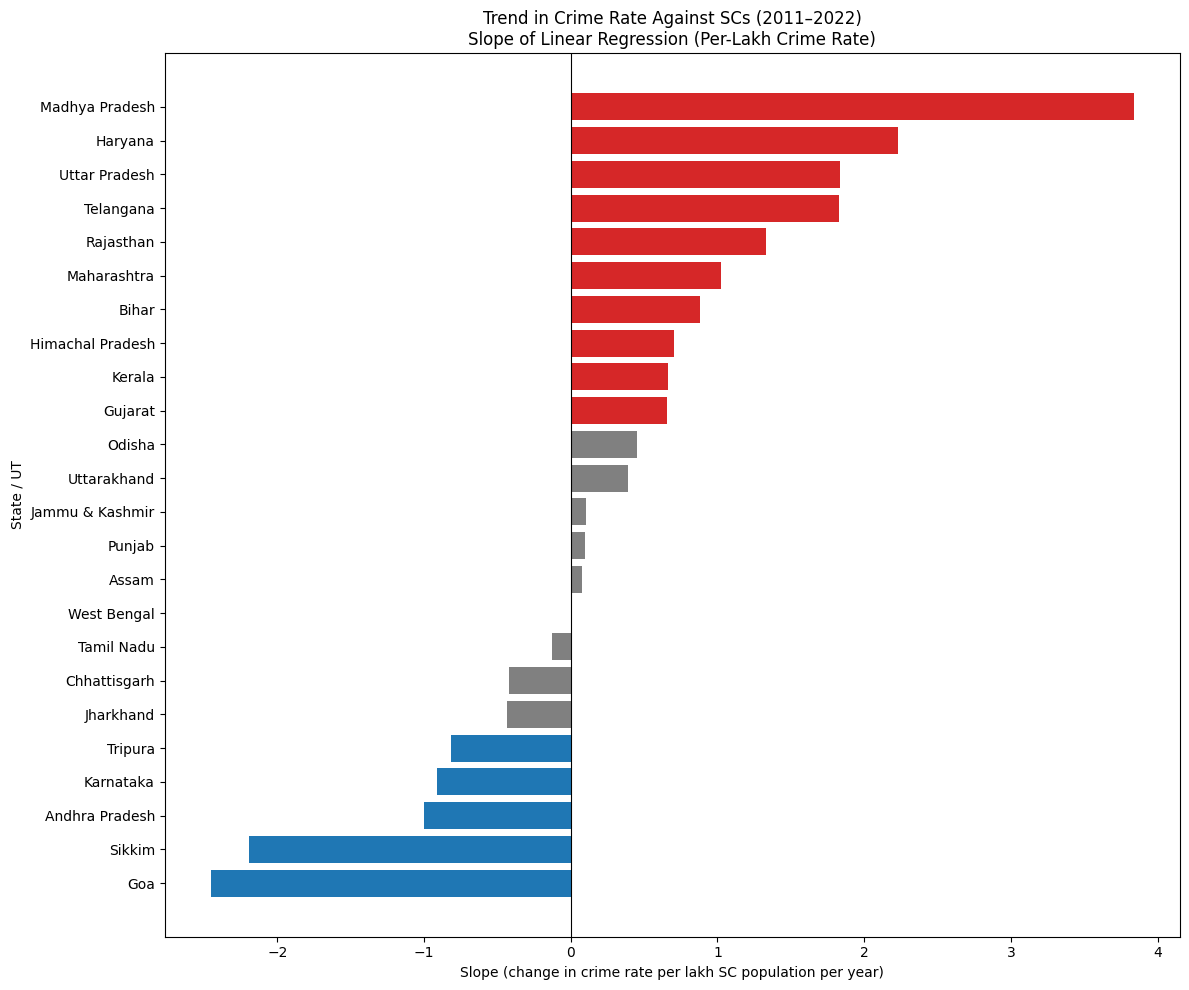

In [12]:
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Filter states with SC pop >= 10,000
pop_filtered = pop[pop["SC population"] >= 10000]

# Reshape crimes data
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# Merge
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Compute per-lakh crime rate
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# -----------------------------
# LINEAR REGRESSION TREND ANALYSIS
# -----------------------------

results = []

for state, group in df_merged.groupby("State/UT"):
    X = group["Year"].values.reshape(-1, 1)
    y = group["Crime_rate_per_lakh_SC"].values

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]

    if slope > 0.5:
        trend = "Increasing"
    elif slope < -0.5:
        trend = "Decreasing"
    else:
        trend = "Stable"

    results.append([state, slope, trend])

trend_table = pd.DataFrame(results, columns=["State/UT", "Slope", "Trend"])
trend_table = trend_table.sort_values("Slope", ascending=True)

# -----------------------------
# HORIZONTAL BAR CHART
# -----------------------------

plt.figure(figsize=(12, 10))

colors = trend_table["Trend"].map({
    "Increasing": "tab:red",
    "Decreasing": "tab:blue",
    "Stable": "gray"
})

plt.barh(trend_table["State/UT"], trend_table["Slope"], color=colors)

plt.title("Trend in Crime Rate Against SCs (2011–2022)\nSlope of Linear Regression (Per-Lakh Crime Rate)")
plt.xlabel("Slope (change in crime rate per lakh SC population per year)")
plt.ylabel("State / UT")

plt.axvline(0, color="black", linewidth=0.8)  # zero-line reference
plt.tight_layout()
plt.show()

In [13]:
pop["SC population"] = pop["SC population"].astype(str).str.replace(",", "")
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# Filter SC population >= 10,000
pop_filtered = pop[pop["SC population"] >= 10000]

# Melt crimes dataset (wide → long)
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# Merge with population
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Compute per-lakh crime rate
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# Sort for rolling calculation
df_merged = df_merged.sort_values(["State/UT", "Year"])

# Compute 3-year moving average for each state
df_merged["Moving_Avg_3yr"] = (
    df_merged.groupby("State/UT")["Crime_rate_per_lakh_SC"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

df_merged.head()

,State/UT,Year,Incidents,SC population,Crime_rate_per_lakh_SC,Moving_Avg_3yr
0,Andhra Pradesh,2011,2847,9834018,28.950527,28.950527
24,Andhra Pradesh,2012,2167,9834018,22.035754,25.493140
48,Andhra Pradesh,2013,2317,9834018,23.561071,24.849117
72,Andhra Pradesh,2014,4114,9834018,41.834375,29.143734
96,Andhra Pradesh,2015,4415,9834018,44.895179,36.763542


In [14]:
pop_filtered = pop[pop["SC population"] >= 10000]

# Melt crime dataset
crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract numeric year
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# Merge
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")

# Compute per-lakh rate
df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# Sort for moving averages
df_merged = df_merged.sort_values(["State/UT", "Year"])

# Compute 3-year moving average
df_merged["Moving_Avg_3yr"] = (
    df_merged.groupby("State/UT")["Crime_rate_per_lakh_SC"]
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# --------------------------------------
# BREAKPOINT ANALYSIS (2014)
# --------------------------------------

breakpoint_year = 2014

results = []

for state, group in df_merged.groupby("State/UT"):

    # Split into Period 1 (2011–2014) and Period 2 (2015–2022)
    before = group[group["Year"] <= breakpoint_year]
    after = group[group["Year"] > breakpoint_year]

    # Prepare linear regression inputs
    X_before = before["Year"].values.reshape(-1, 1)
    y_before = before["Moving_Avg_3yr"].values

    X_after = after["Year"].values.reshape(-1, 1)
    y_after = after["Moving_Avg_3yr"].values

    # Fit regressions
    model_before = LinearRegression().fit(X_before, y_before)
    model_after = LinearRegression().fit(X_after, y_after)

    slope_before = model_before.coef_[0]
    slope_after = model_after.coef_[0]

    # Change in slope
    delta = slope_after - slope_before

    # Classification threshold
    threshold = 0.5

    if delta > threshold:
        status = "Worsened"
    elif delta < -threshold:
        status = "Improved"
    else:
        status = "Stable"

    results.append([state, slope_before, slope_after, delta, status])


trend_shift_table = pd.DataFrame(
    results,
    columns=["State/UT", "Slope_Before_2014", "Slope_After_2014", "Change_in_Slope", "Trend_Shift"]
)

trend_shift_table = trend_shift_table.sort_values("Change_in_Slope", ascending=False)
trend_shift_table

,State/UT,Slope_Before_2014,Slope_After_2014,Change_in_Slope,Trend_Shift
12,Madhya Pradesh,0.174274,3.880746,3.706473,Worsened
21,Uttar Pradesh,-0.413225,1.902579,2.315804,Worsened
6,Haryana,0.792655,2.158570,1.365915,Worsened
19,Telangana,0.011127,1.232549,1.221421,Worsened
11,Kerala,0.293311,0.704495,0.411184,Stable
7,Himachal Pradesh,0.746951,1.137752,0.390801,Stable
8,Jammu & Kashmir,-0.016216,0.150152,0.166368,Stable
5,Gujarat,0.508408,0.620148,0.111740,Stable
22,Uttarakhand,0.171729,0.266505,0.094776,Stable
1,Assam,0.071706,0.122712,0.051005,Stable


In [15]:
results = []

for state, group in df_merged.groupby("State/UT"):

    X = group["Year"].values.reshape(-1, 1)
    y = group["Moving_Avg_3yr"].values

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]

    # Trend classification threshold
    if slope > 0.5:
        trend = "Increasing"
    elif slope < -0.5:
        trend = "Decreasing"
    else:
        trend = "Stable"

    results.append([state, slope, trend])

trend_table_ma = pd.DataFrame(
    results,
    columns=["State/UT", "Slope_using_MA", "Trend"]
)

trend_table_ma = trend_table_ma.sort_values("Slope_using_MA", ascending=False)

trend_table_ma

,State/UT,Slope_using_MA,Trend
12,Madhya Pradesh,3.339464,Increasing
6,Haryana,1.904692,Increasing
19,Telangana,1.846047,Increasing
21,Uttar Pradesh,1.585641,Increasing
2,Bihar,1.411265,Increasing
13,Maharashtra,0.959606,Increasing
16,Rajasthan,0.878985,Increasing
5,Gujarat,0.801830,Increasing
7,Himachal Pradesh,0.626374,Increasing
11,Kerala,0.499958,Stable


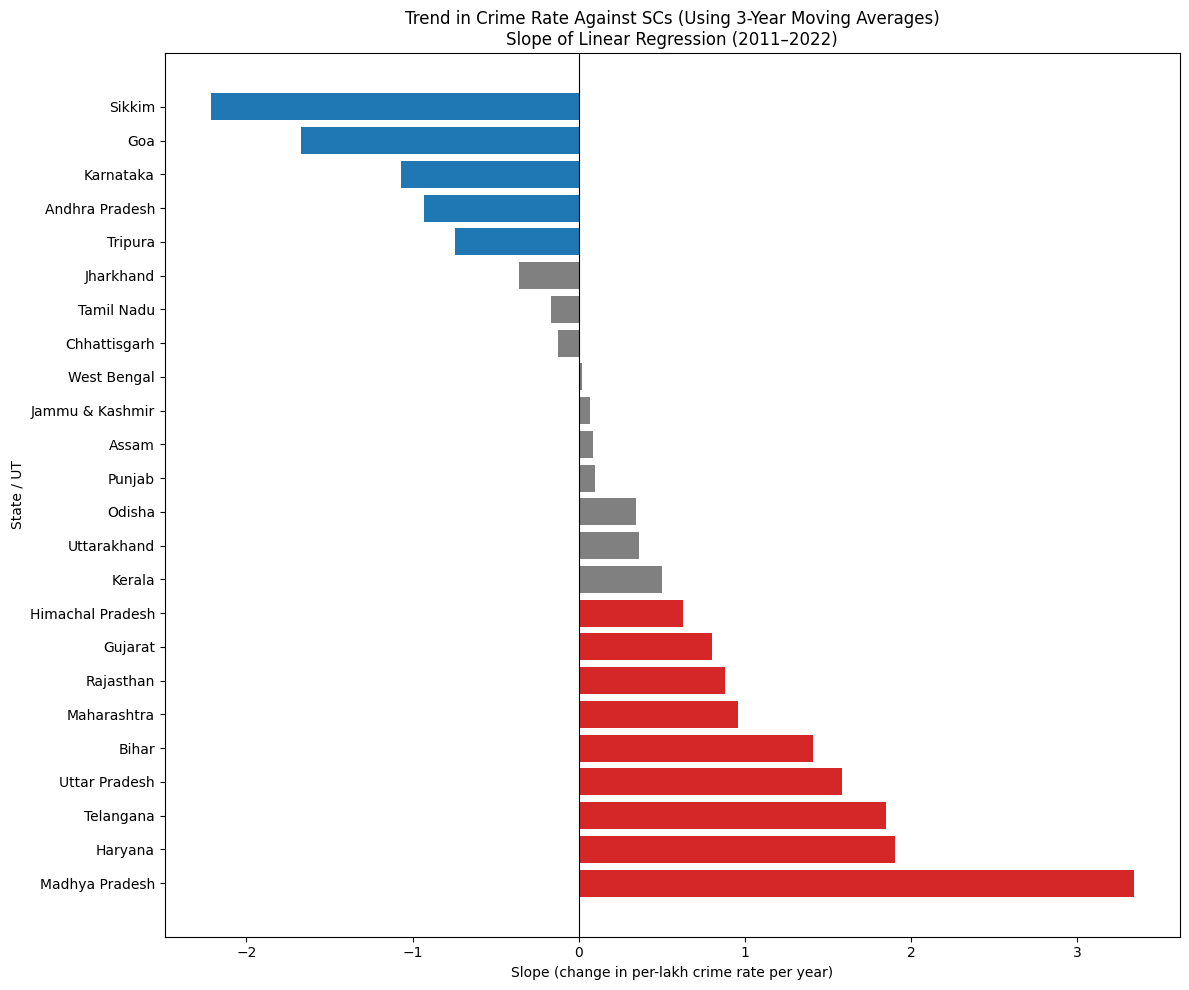

In [16]:
plt.figure(figsize=(12, 10))

colors = trend_table_ma["Trend"].map({
    "Increasing": "tab:red",
    "Decreasing": "tab:blue",
    "Stable": "gray"
})

plt.barh(trend_table_ma["State/UT"], trend_table_ma["Slope_using_MA"], color=colors)

plt.title("Trend in Crime Rate Against SCs (Using 3-Year Moving Averages)\nSlope of Linear Regression (2011–2022)")
plt.xlabel("Slope (change in per-lakh crime rate per year)")
plt.ylabel("State / UT")

plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

Using 3-year moving averages and linear regression slope analysis, the long-term crime patterns against Scheduled Caste (SC) communities across Indian states reveal significant structural differences in trajectories from 2011 to 2022. Unlike raw annual numbers, the smoothed trend curves remove short-term noise and highlight genuine directional shifts over the decade.

The analysis shows a clear bifurcation among states:

1. States with Rising Long-Term Trends

A cluster of large states — including Madhya Pradesh, Haryana, Telangana, Uttar Pradesh, Bihar, Maharashtra, Rajasthan, and Gujarat — exhibit strong positive slopes, indicating that caste-related crimes per lakh SC population are increasing steadily over the decade.
For some states, especially Madhya Pradesh and Haryana, the slope is steep enough to suggest a structural and persistent escalation, not just year-to-year volatility. These states represent the principal contributors to India’s upward national trajectory.

2. States with Declining Trends

A smaller group of states — notably Sikkim, Goa, Karnataka, Andhra Pradesh, and Tripura — show clear negative slopes, suggesting a long-term decrease in per-capita caste crimes.
While some of these states have smaller SC populations, the direction of change is still meaningful: the overall risk for SC communities appears to have reduced over the decade.

3. States with Flat or Stable Trends

States like Punjab, Kerala, Odisha, Chhattisgarh, Jharkhand, Tamil Nadu, West Bengal, and others display near-zero slopes, indicating that the underlying risk level has not shifted dramatically over the 12-year period.
These states neither show meaningful deterioration nor improvement; instead, the per-capita rate appears to hover around a long-term equilibrium.

**NATIONAL PICTURE** - **Most large and high-population states show rising long-term crime trends against SC communities, while the improving states tend to be smaller or already low-crime regions.**

# Comparing States with similar SC populations

In [17]:
crimes = pd.read_csv("NCRB caste based crimes 10 year - sheet1.csv")
pop = pd.read_csv("states and sc population.csv")

# ------------------------------------------
# CLEAN COLUMN NAMES
# ------------------------------------------

crimes.columns = crimes.columns.str.strip()
pop.columns = pop.columns.str.strip()

# ------------------------------------------
# CLEAN POPULATION VALUES
# ------------------------------------------

pop["SC population"] = (
    pop["SC population"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)
pop["SC population"] = pd.to_numeric(pop["SC population"], errors="coerce")

# ------------------------------------------
# MELT NCRB DATA (WIDE → LONG)
# ------------------------------------------

crime_long = crimes.melt(
    id_vars="State/UT",
    var_name="Year",
    value_name="Incidents"
)

# Extract year number from "Year 2011"
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# ------------------------------------------
# MERGE POPULATION WITH CRIME DATA
# ------------------------------------------

df_merged = crime_long.merge(pop, on="State/UT", how="left")

# ------------------------------------------
# CHECK FOR MISSING POPULATION
# ------------------------------------------
missing_pop = df_merged[df_merged["SC population"].isna()]
print("States missing population (should be zero):")
print(missing_pop["State/UT"].unique())

# ------------------------------------------
# COMPUTE CRIME RATE PER LAKH
# ------------------------------------------

df_merged["Crime_rate_per_lakh_SC"] = (
    df_merged["Incidents"] / df_merged["SC population"]
) * 100000

# ------------------------------------------
# REORDER COLUMNS FOR CLEAN OUTPUT
# ------------------------------------------

df_merged = df_merged[
    ["State/UT", "Year", "Incidents", "SC population", "Crime_rate_per_lakh_SC"]
]

# ------------------------------------------
# FINAL CHECK
# ------------------------------------------

print("\nNumber of states in df_merged:",
      df_merged["State/UT"].nunique())

print(df_merged.head(30))

States missing population (should be zero):
[]

Number of states in df_merged: 29
             State/UT  Year  Incidents  SC population  Crime_rate_per_lakh_SC
0      Andhra Pradesh  2011       2847        9834018               28.950527
1   Arunachal Pradesh  2011          0           7664                0.000000
2               Assam  2011          0        2231321                0.000000
3               Bihar  2011       3623       16567325               21.868346
4        Chhattisgarh  2011        253        3274900                7.725427
5                 Goa  2011          4          24934               16.042352
6             Gujarat  2011       1063        4074811               26.087099
7             Haryana  2011        408        5113615                7.978700
8    Himachal Pradesh  2011         94        1729252                5.435876
9     Jammu & Kashmir  2011          1         924991                0.108109
10          Jharkhand  2011        636        3985644       

In [18]:
import pandas as pd
import numpy as np

# Step 1: Compute average crime rate per state
avg_rates = (
    df_merged.groupby("State/UT")["Crime_rate_per_lakh_SC"]
    .mean()
    .reset_index()
)

# Step 2: MERGE WITH FULL POPULATION DATA (NOT pop_filtered!)
avg_rates = avg_rates.merge(
    pop[["State/UT", "SC population"]],
    on="State/UT",
    how="left"
)

# Step 3: Create population bands
bins = [0, 3_000_000, 6_000_000, 9_000_000, 12_000_000, 999_000_000]
labels = ["0–30 lakh", "30–60 lakh", "60–90 lakh", "90–120 lakh", "1.2 crore+"]

avg_rates["Population_Band"] = pd.cut(
    avg_rates["SC population"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Step 4: Group states within each band
band_groups = (
    avg_rates.groupby("Population_Band")[["State/UT", "Crime_rate_per_lakh_SC"]]
    .apply(lambda x: x.sort_values("Crime_rate_per_lakh_SC", ascending=False))
)

band_groups


/tmp/ipython-input-639560903.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rates.groupby("Population_Band")[["State/UT", "Crime_rate_per_lakh_SC"]]


State/UT  Crime_rate_per_lakh_SC
Population_Band                                              
0–30 lakh       17            Mizoram            20833.333333
                15            Manipur              209.643606
                5                 Goa               33.087351
                22             Sikkim               17.816253
                8    Himachal Pradesh                8.852575
                27        Uttarakhand                3.874912
                25            Tripura                2.952024
                2               Assam                0.444430
                9     Jammu & Kashmir                0.342346
                1   Arunachal Pradesh                0.000000
                16          Meghalaya                0.000000
                18           Nagaland                     NaN
30–60 lakh      24          Telangana               37.284972
                6             Gujarat               30.479941
                12             Kerala               27.987929
                7             Haryana               17.495777
                10          Jharkhand               16.916965
                4        Chhattisgarh               12.598349
60–90 lakh      19             Odisha               29.662104
                20             Punjab                1.568817
90–120 lakh     13     Madhya Pradesh               44.168653
                0      Andhra Pradesh               25.718548
                11          Karnataka               18.617153
1.2 crore+      21          Rajasthan               52.030860
                3               Bihar               37.859663
                26      Uttar Pradesh               25.038924
                14        Maharashtra               14.358100
                23         Tamil Nadu               10.292544
                28        West Bengal                0.551329

States having similar population have been grouped together, we shall now analyse the difference in crime rates

In [19]:
import pandas as pd

# We assume avg_rates and Population_Band are already created.
# If not, this code will still run as long as avg_rates exists.

top_bottom_results = []

for band, group in avg_rates.groupby("Population_Band"):
    group_sorted = group.sort_values("Crime_rate_per_lakh_SC", ascending=False)

    top_states = group_sorted.head(3)[["State/UT", "Crime_rate_per_lakh_SC"]]
    bottom_states = group_sorted.tail(3)[["State/UT", "Crime_rate_per_lakh_SC"]]

    top_states = top_states.copy()
    bottom_states = bottom_states.copy()

    top_states["Rank"] = "Top"
    bottom_states["Rank"] = "Bottom"

    top_states["Population_Band"] = band
    bottom_states["Population_Band"] = band

    top_bottom_results.append(top_states)
    top_bottom_results.append(bottom_states)

top_bottom_table = pd.concat(top_bottom_results)
top_bottom_table = top_bottom_table[["Population_Band", "Rank", "State/UT", "Crime_rate_per_lakh_SC"]]
top_bottom_table


/tmp/ipython-input-2406609162.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for band, group in avg_rates.groupby("Population_Band"):


,Population_Band,Rank,State/UT,Crime_rate_per_lakh_SC
17,0–30 lakh,Top,Mizoram,20833.333333
15,0–30 lakh,Top,Manipur,209.643606
5,0–30 lakh,Top,Goa,33.087351
1,0–30 lakh,Bottom,Arunachal Pradesh,0.000000
16,0–30 lakh,Bottom,Meghalaya,0.000000
18,0–30 lakh,Bottom,Nagaland,NaN
24,30–60 lakh,Top,Telangana,37.284972
6,30–60 lakh,Top,Gujarat,30.479941
12,30–60 lakh,Top,Kerala,27.987929
7,30–60 lakh,Bottom,Haryana,17.495777


In [20]:
MIN_POP = 100000
pop_valid = pop[pop["SC population"] >= MIN_POP].copy()

# ---------------------------------------------------------
# 2. BUILD avg_rates AGAIN for ONLY THESE STATES
# ---------------------------------------------------------
avg_rates = (
    df_merged.groupby("State/UT")["Crime_rate_per_lakh_SC"]
    .mean()
    .reset_index()
)

# Merge with *pop_valid* only
avg_rates = avg_rates.merge(
    pop_valid[["State/UT", "SC population"]],
    on="State/UT",
    how="inner"    # <-- ensures only valid population states remain
)

# ---------------------------------------------------------
# 3. CREATE POPULATION BANDS (CORRECTED FOR INDIA SIZES)
# ---------------------------------------------------------
bins = [0,
        3_000_000,      # 0–30 lakh
        6_000_000,      # 30–60 lakh
        10_000_000,     # 60 lakh–1 crore
        20_000_000,     # 1–2 crore
        60_000_000]     # 2 crore+ (UP is here)

labels = ["0–30 lakh", "30–60 lakh", "60 lakh–1 crore", "1–2 crore", "2 crore+"]

avg_rates["Population_Band"] = pd.cut(
    avg_rates["SC population"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# ---------------------------------------------------------
# 4. SHOW RESULTING GROUPS
# ---------------------------------------------------------
band_groups = (
    avg_rates.groupby("Population_Band")[["State/UT", "SC population", "Crime_rate_per_lakh_SC"]]
    .apply(lambda x: x.sort_values("Crime_rate_per_lakh_SC", ascending=False))
)

band_groups

/tmp/ipython-input-2482122659.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rates.groupby("Population_Band")[["State/UT", "SC population", "Crime_rate_per_lakh_SC"]]


State/UT  SC population  Crime_rate_per_lakh_SC
Population_Band                                                            
0–30 lakh       6   Himachal Pradesh        1729252                8.852575
                20       Uttarakhand        1892516                3.874912
                18           Tripura         654918                2.952024
                1              Assam        2231321                0.444430
                7    Jammu & Kashmir         924991                0.342346
30–60 lakh      17         Telangana        4044078               37.284972
                4            Gujarat        4074811               30.479941
                10            Kerala        3040001               27.987929
                5            Haryana        5113615               17.495777
                8          Jharkhand        3985644               16.916965
                3       Chhattisgarh        3274900               12.598349
60 lakh–1 crore 13            Odisha        7188465               29.662104
                0     Andhra Pradesh        9834018               25.718548
                14            Punjab        8860179                1.568817
1–2 crore       15         Rajasthan       12221593               52.030860
                11    Madhya Pradesh       11342320               44.168653
                2              Bihar       16567325               37.859663
                9          Karnataka       10474659               18.617153
                12       Maharashtra       13275898               14.358100
                16        Tamil Nadu       14438445               10.292544
2 crore+        19     Uttar Pradesh       41357608               25.038924
                21       West Bengal       21463270                0.551329

In [21]:
top_bottom_list = []

for band, group in avg_rates.groupby("Population_Band"):
    # Sort states by per-lakh crime rate
    sorted_group = group.sort_values("Crime_rate_per_lakh_SC", ascending=False)

    # Top performer (highest crime rate)
    top_member = sorted_group.head(1).copy()
    top_member["Rank"] = "highest"

    # Bottom performer (lowest crime rate)
    bottom_member = sorted_group.tail(1).copy()
    bottom_member["Rank"] = "lowest"

    # Add the band name
    top_member["Population_Band"] = band
    bottom_member["Population_Band"] = band

    top_bottom_list.append(top_member)
    top_bottom_list.append(bottom_member)

# Combine into final clean table
top_bottom_each_band = pd.concat(top_bottom_list)[
    ["Population_Band", "Rank", "State/UT", "Crime_rate_per_lakh_SC", "SC population"]
]

top_bottom_each_band

/tmp/ipython-input-392660840.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for band, group in avg_rates.groupby("Population_Band"):


,Population_Band,Rank,State/UT,Crime_rate_per_lakh_SC,SC population
6,0–30 lakh,highest,Himachal Pradesh,8.852575,1729252
7,0–30 lakh,lowest,Jammu & Kashmir,0.342346,924991
17,30–60 lakh,highest,Telangana,37.284972,4044078
3,30–60 lakh,lowest,Chhattisgarh,12.598349,3274900
13,60 lakh–1 crore,highest,Odisha,29.662104,7188465
14,60 lakh–1 crore,lowest,Punjab,1.568817,8860179
15,1–2 crore,highest,Rajasthan,52.030860,12221593
16,1–2 crore,lowest,Tamil Nadu,10.292544,14438445
19,2 crore+,highest,Uttar Pradesh,25.038924,41357608
21,2 crore+,lowest,West Bengal,0.551329,21463270


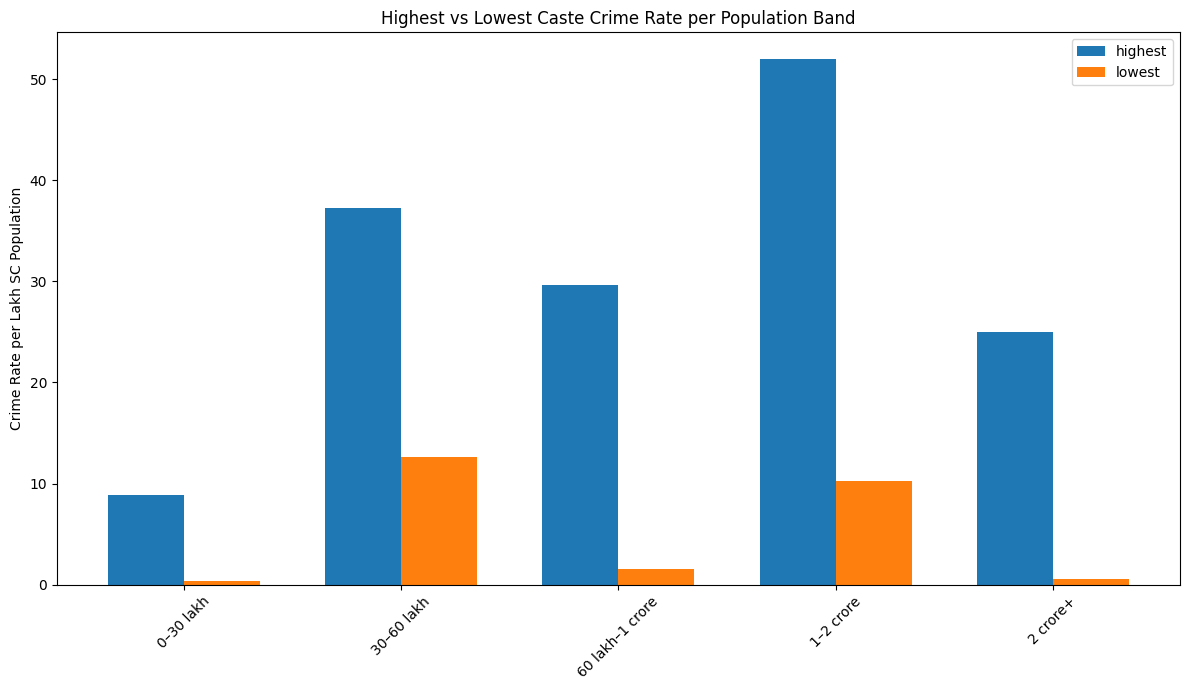

In [22]:
plt.figure(figsize=(12, 7))

bands = top_bottom_each_band["Population_Band"].unique()
bands_sorted = [b for b in labels if b in bands]  # maintain order

x = range(len(bands_sorted))
width = 0.35

# Extract highest & lowest series aligned to band order
highest_vals = [top_bottom_each_band[
    (top_bottom_each_band["Population_Band"] == b) &
    (top_bottom_each_band["Rank"] == "highest")
]["Crime_rate_per_lakh_SC"].values[0] for b in bands_sorted]

lowest_vals = [top_bottom_each_band[
    (top_bottom_each_band["Population_Band"] == b) &
    (top_bottom_each_band["Rank"] == "lowest")
]["Crime_rate_per_lakh_SC"].values[0] for b in bands_sorted]

plt.bar([i - width/2 for i in x], highest_vals, width=width, label="highest")
plt.bar([i + width/2 for i in x], lowest_vals, width=width, label="lowest")

plt.xticks(x, bands_sorted, rotation=45)
plt.ylabel("Crime Rate per Lakh SC Population")
plt.title("Highest vs Lowest Caste Crime Rate per Population Band")
plt.legend()

plt.tight_layout()
plt.show()

Question arises - Why do states with similar population differ so hugely in crime rate against SCs ?

# Outliers - States with exceptionally high crime rates

In [23]:
import pandas as pd
import numpy as np

# ------------------------------------------------
# 1. FILTER POPULATION: KEEP ONLY STATES WITH SC POP ≥ 100,000
# ------------------------------------------------

MIN_POP = 100000
pop_valid = pop[pop["SC population"] >= MIN_POP][["State/UT", "SC population"]]

# ------------------------------------------------
# 2. COMPUTE AVERAGE CRIME RATE PER STATE
# ------------------------------------------------

avg_rates = (
    df_merged.groupby("State/UT")["Crime_rate_per_lakh_SC"]
    .mean()
    .reset_index()
)

# Merge only valid states
avg_rates = avg_rates.merge(pop_valid, on="State/UT", how="inner")

# ------------------------------------------------
# 3. CALCULATE Z-SCORES
# ------------------------------------------------

mean_rate = avg_rates["Crime_rate_per_lakh_SC"].mean()
std_rate = avg_rates["Crime_rate_per_lakh_SC"].std()

avg_rates["Z_score"] = (avg_rates["Crime_rate_per_lakh_SC"] - mean_rate) / std_rate

# ------------------------------------------------
# 4. IDENTIFY OUTLIERS
# ------------------------------------------------

high_outliers = avg_rates[avg_rates["Z_score"] >= 2].sort_values("Z_score", ascending=False)
low_outliers  = avg_rates[avg_rates["Z_score"] <= -2].sort_values("Z_score")

# ------------------------------------------------
# 5. SHOW RESULTS
# ------------------------------------------------

avg_rates_sorted = avg_rates.sort_values("Z_score", ascending=False)

#avg_rates_sorted, high_outliers, low_outliers
print(high_outliers)

     State/UT  Crime_rate_per_lakh_SC  SC population   Z_score
15  Rajasthan                52.03086       12221593  2.160586


A Z score analysis reveals that Rajasthan has an exceptionally high rate of crime against its SC population

# CORRELATION

In [24]:
correlation_results = []

for state, group in df_merged.groupby("State/UT"):

    # Drop missing values in case any state has NaN years/rates
    g = group.dropna(subset=["Year", "Crime_rate_per_lakh_SC"])

    if len(g) > 1:  # at least 2 points needed to compute correlation
        corr = g["Year"].corr(g["Crime_rate_per_lakh_SC"])
    else:
        corr = np.nan  # insufficient data

    correlation_results.append([state, corr])

# Convert to DataFrame
correlation_table = pd.DataFrame(
    correlation_results,
    columns=["State/UT", "Correlation_Year_vs_Rate"]
)

# Sort: highest = smoothest trend, lowest = most chaotic
correlation_table = correlation_table.sort_values(
    "Correlation_Year_vs_Rate",
    ascending=False
)

correlation_table

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,State/UT,Correlation_Year_vs_Rate
26,Uttar Pradesh,0.963292
13,Madhya Pradesh,0.948446
14,Maharashtra,0.944975
7,Haryana,0.936754
20,Punjab,0.864604
27,Uttarakhand,0.860130
12,Kerala,0.822398
24,Telangana,0.790698
8,Himachal Pradesh,0.778077
2,Assam,0.765456


In [25]:
!pip install statsmodels

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


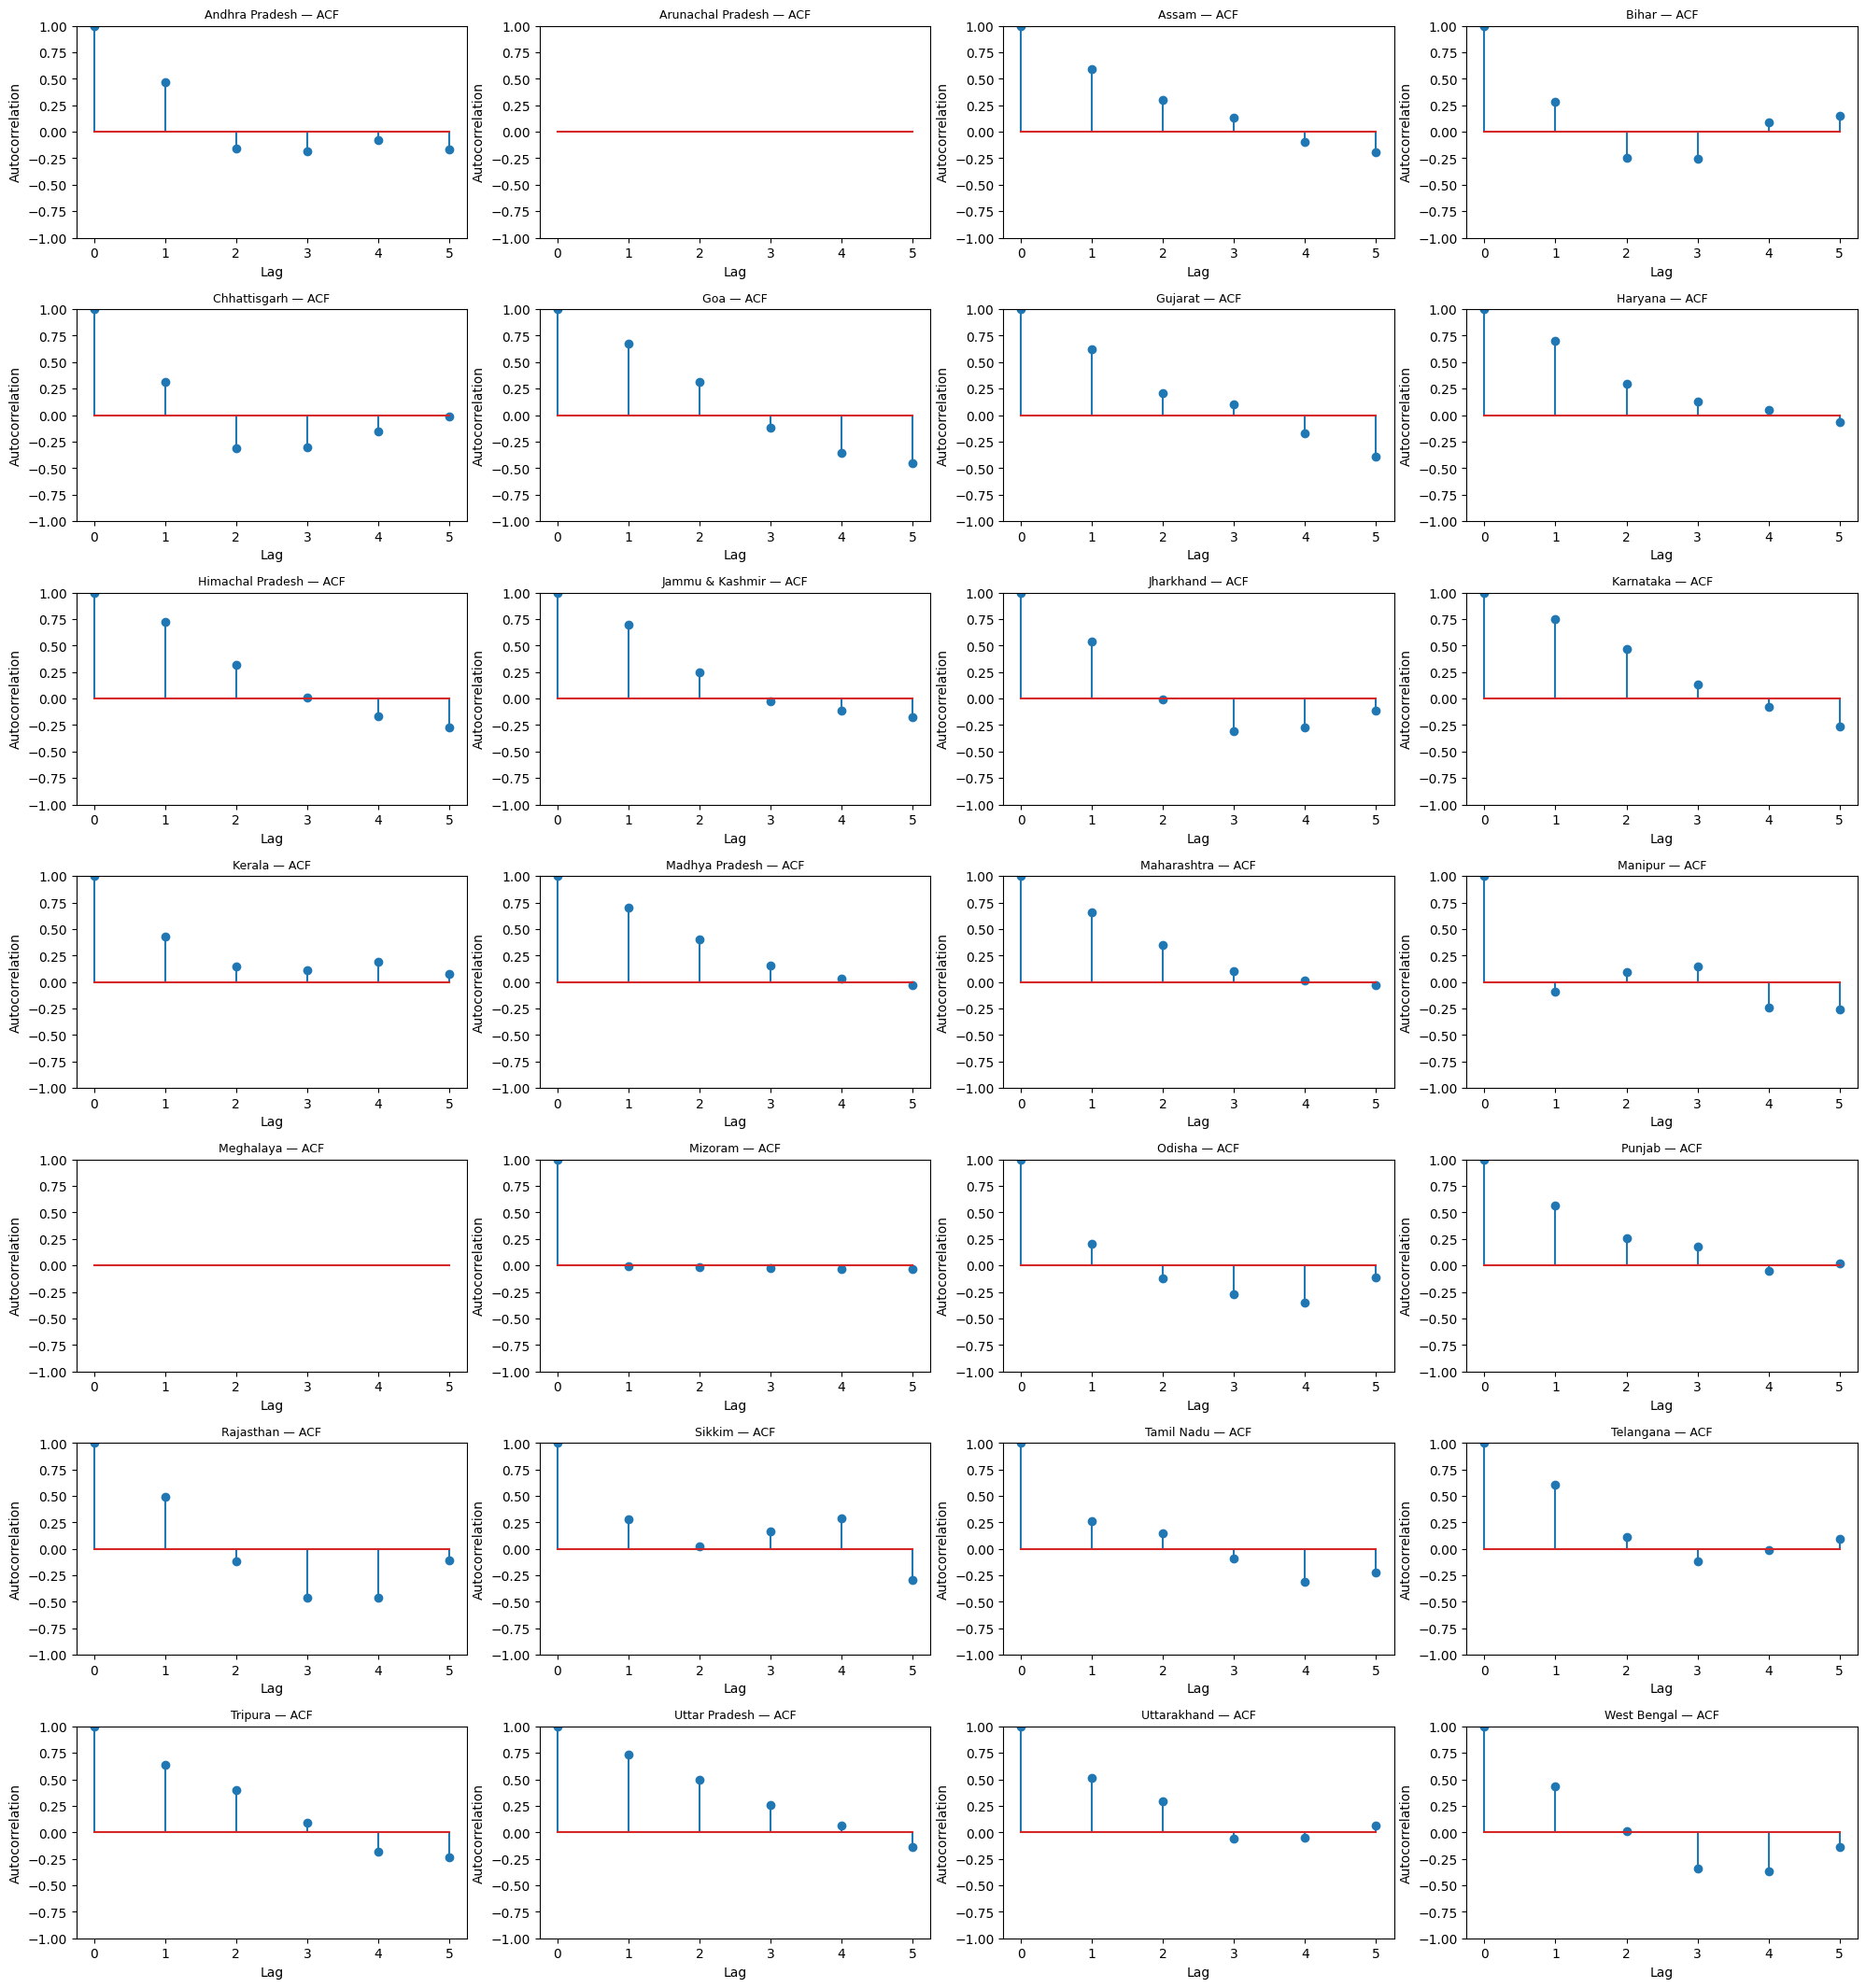

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

states = sorted(df_merged["State/UT"].unique())

num_states = len(states)
cols = 4
rows = int(np.ceil(num_states / cols))

plt.figure(figsize=(20, rows * 3))

plot_index = 1

for state in states:
    # Extract state's time series
    series = (
        df_merged[df_merged["State/UT"] == state]
        .sort_values("Year")["Crime_rate_per_lakh_SC"]
        .dropna()
        .values
    )

    # Skip states with insufficient data
    if len(series) < 3:
        continue

    # Compute ACF
    acf_values = acf(series, fft=False, nlags=min(5, len(series) - 1))

    # Plot
    plt.subplot(rows, cols, plot_index)
    plt.stem(acf_values)  # Removed unsupported argument
    plt.title(f"{state} — ACF", fontsize=9)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.ylim(-1, 1)

    plot_index += 1

plt.tight_layout()
plt.show()


*   Andhra Pradesh - crime rate is strongly related to last year's crime rate - but it has no multi year pattern
*   ASSAM - data has momentum , lower lag 2 and 3 values are indicative of an autoregressive pattern
*   BIHAR - High volatility state - data random
*   GOA - Short term pattern is there (lag1,2,3) but no indication of a long term pattern
*   UTTAR PRADESH - Indicaton of a strong patter - (high lag1,2,3 values and positive lag 4 values)
*   RAJASTHAN - Short term memory state


States remaining after filtering: 22
States removed: {'Mizoram', 'Sikkim', 'Nagaland', 'Goa', 'Arunachal Pradesh', 'Meghalaya', 'Manipur'}


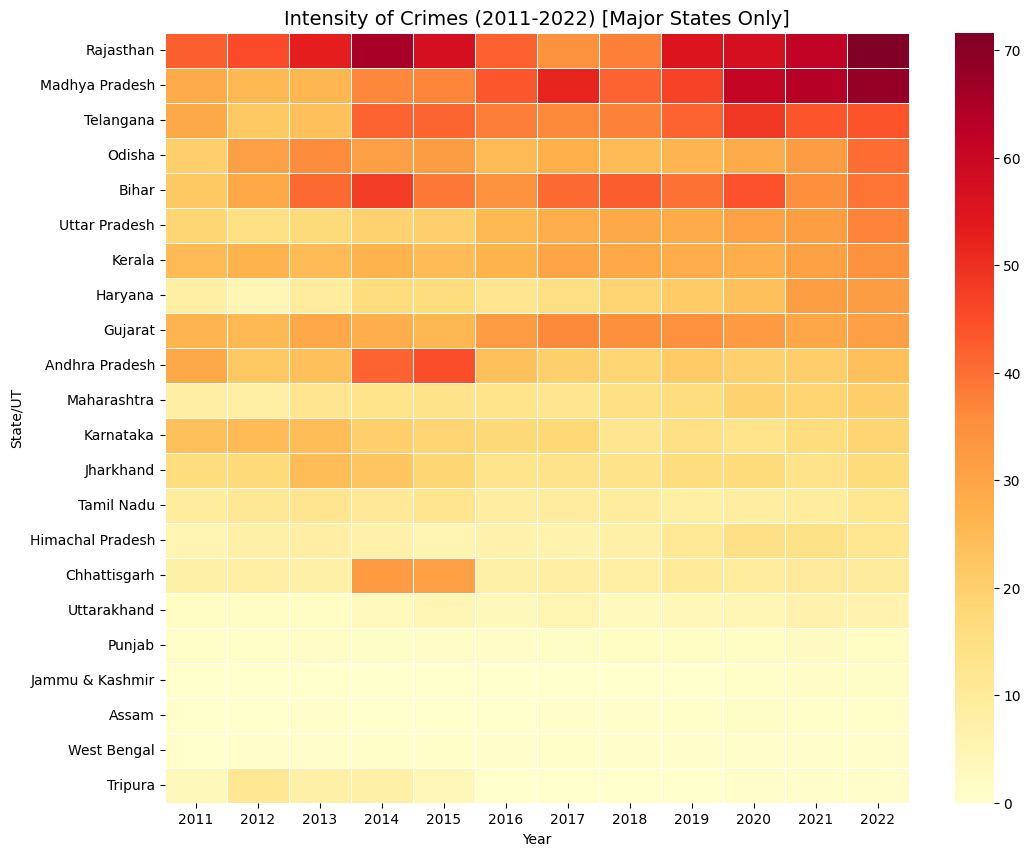

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. CLEAN & FILTER POPULATION (Threshold = 100,000)
pop["SC population"] = pd.to_numeric(pop["SC population"].astype(str).str.replace(",", ""), errors="coerce")

# The Critical Fix: Filter for >= 100,000
pop_filtered = pop[pop["SC population"] >= 100000]

print(f"States remaining after filtering: {pop_filtered['State/UT'].nunique()}")
print(f"States removed: {set(pop['State/UT'].unique()) - set(pop_filtered['State/UT'].unique())}")

# 2. PREPARE CRIME DATA
crime_long = crimes.melt(id_vars="State/UT", var_name="Year", value_name="Incidents")
crime_long["Year"] = crime_long["Year"].str.extract(r"(\d+)").astype(int)

# 3. MERGE & CALCULATE RATES
df_merged = crime_long.merge(pop_filtered, on="State/UT", how="inner")
df_merged["Crime_rate_per_lakh_SC"] = (df_merged["Incidents"] / df_merged["SC population"]) * 100000

# 4. RE-RUN SLOPE ANALYSIS (Linear Regression)
slope_results = []

for state, group in df_merged.groupby("State/UT"):
    X = group["Year"].values.reshape(-1, 1)
    y = group["Crime_rate_per_lakh_SC"].values

    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]

    # Classify Trend
    if slope > 0.5: trend = "Increasing"
    elif slope < -0.5: trend = "Decreasing"
    else: trend = "Stable"

    slope_results.append([state, slope, trend])

trend_df = pd.DataFrame(slope_results, columns=["State/UT", "Slope", "Trend"]).sort_values("Slope")

'''# 5. PLOT 1: THE CORRECTED SLOPE CHART
plt.figure(figsize=(12, 10))
colors = trend_df["Trend"].map({"Increasing": "#d62728", "Decreasing": "#1f77b4", "Stable": "gray"})
plt.barh(trend_df["State/UT"], trend_df["Slope"], color=colors)
plt.title("Corrected Trend Analysis (States with SC Pop > 1 Lakh)\n(2011-2022)", fontsize=14)
plt.xlabel("Annual Change in Crime Rate (Slope)")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()'''

# 6. PLOT 2: THE CORRECTED HEATMAP
heatmap_data = df_merged.pivot(index="State/UT", columns="Year", values="Crime_rate_per_lakh_SC")
heatmap_data = heatmap_data.sort_values(by=2022, ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)
plt.title("Intensity of Crimes (2011-2022) [Major States Only]", fontsize=14)
plt.show()



> Add blockquote



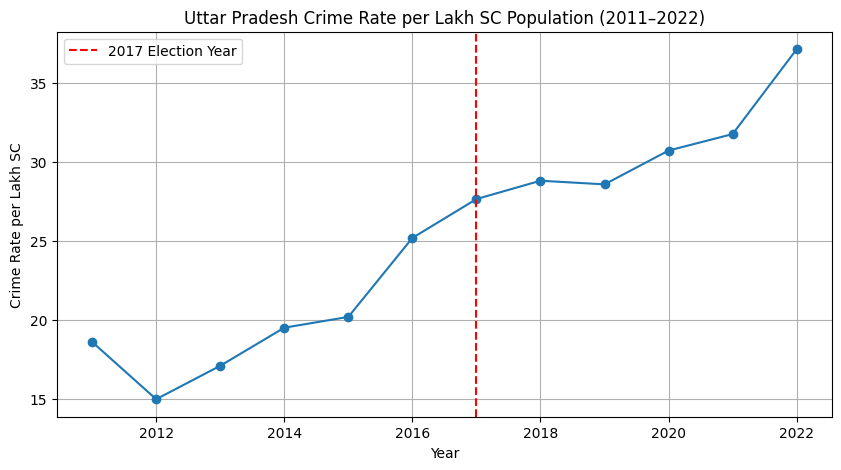

Average Crime Rate before 2017: 19.279403199527405
Average Crime Rate in/after 2017: 30.798444629583027
Difference (post - pre): 11.519041430055623
                              OLS Regression Results                              
Dep. Variable:     Crime_rate_per_lakh_SC   R-squared:                       0.934
Model:                                OLS   Adj. R-squared:                  0.920
Method:                     Least Squares   F-statistic:                     64.12
Date:                    Tue, 25 Nov 2025   Prob (F-statistic):           4.73e-06
Time:                            17:56:50   Log-Likelihood:                -23.265
No. Observations:                      12   AIC:                             52.53
Df Residuals:                           9   BIC:                             53.98
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter UP data
up = df_merged[df_merged["State/UT"] == "Uttar Pradesh"].copy()
up = up.sort_values("Year")

# -------------------------------
# 1. LINE PLOT AROUND 2017
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(up["Year"], up["Crime_rate_per_lakh_SC"], marker="o")
plt.axvline(2017, color='red', linestyle='--', label="2017 Election Year")
plt.title("Uttar Pradesh Crime Rate per Lakh SC Population (2011–2022)")
plt.ylabel("Crime Rate per Lakh SC")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 2. PRE vs POST 2017 COMPARISON
# -------------------------------
pre = up[up["Year"] < 2017]["Crime_rate_per_lakh_SC"]
post = up[up["Year"] >= 2017]["Crime_rate_per_lakh_SC"]

print("Average Crime Rate before 2017:", pre.mean())
print("Average Crime Rate in/after 2017:", post.mean())
print("Difference (post - pre):", post.mean() - pre.mean())

# -------------------------------
# 3. SIMPLE ELECTION IMPACT MODEL
#    Y = β0 + β1 * (Year) + β2 * (Post2017)
# -------------------------------
up["Post2017"] = (up["Year"] >= 2017).astype(int)
X = up[["Year", "Post2017"]]
X = sm.add_constant(X)
y = up["Crime_rate_per_lakh_SC"]

model = sm.OLS(y, X).fit()
print(model.summary())

# β2 (coefficient of Post2017) tells you:
#   - If it's positive & significant → crime jumped after 2017
#   - If negative → crime fell after 2017
#   - If insignificant → election had no measurable shift


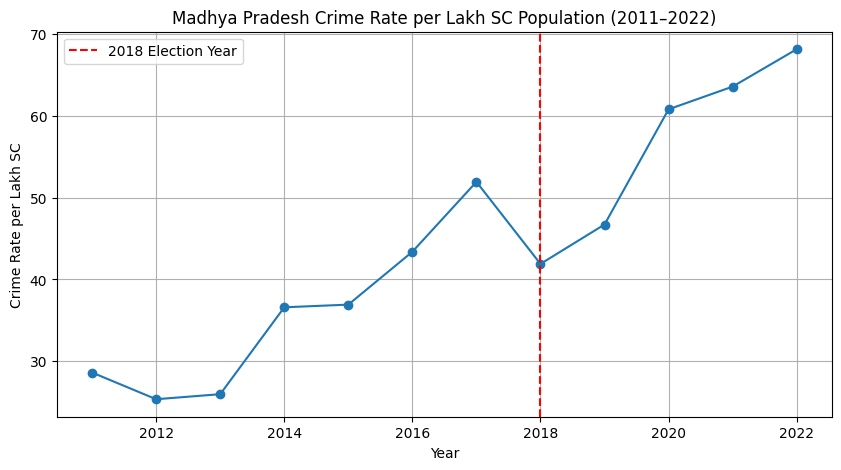

Average Crime Rate before 2018 : 35.54072585805071
Average Crime Rate in/after 2018 : 56.24775178270407
Difference (post - pre): 20.707025924653358
                              OLS Regression Results                              
Dep. Variable:     Crime_rate_per_lakh_SC   R-squared:                       0.925
Model:                                OLS   Adj. R-squared:                  0.908
Method:                     Least Squares   F-statistic:                     55.36
Date:                    Tue, 25 Nov 2025   Prob (F-statistic):           8.76e-06
Time:                            18:08:41   Log-Likelihood:                -33.143
No. Observations:                      12   AIC:                             72.29
Df Residuals:                           9   BIC:                             73.74
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter MP data
mp = df_merged[df_merged["State/UT"] == "Madhya Pradesh"].copy()
mp = mp.sort_values("Year")

BREAK_YEAR = 2018  # <-- changed here

# -------------------------------
# 1. LINE PLOT AROUND 2018
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(mp["Year"], mp["Crime_rate_per_lakh_SC"], marker="o")
plt.axvline(BREAK_YEAR, color='red', linestyle='--', label=f"{BREAK_YEAR} Election Year")
plt.title("Madhya Pradesh Crime Rate per Lakh SC Population (2011–2022)")
plt.ylabel("Crime Rate per Lakh SC")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 2. PRE vs POST BREAK YEAR
# -------------------------------
pre = mp[mp["Year"] < BREAK_YEAR]["Crime_rate_per_lakh_SC"]
post = mp[mp["Year"] >= BREAK_YEAR]["Crime_rate_per_lakh_SC"]

print("Average Crime Rate before", BREAK_YEAR, ":", pre.mean())
print("Average Crime Rate in/after", BREAK_YEAR, ":", post.mean())
print("Difference (post - pre):", post.mean() - pre.mean())

# -------------------------------
# 3. REGRESSION WITH PostBREAK DUMMY
#    Y = β0 + β1 * Year + β2 * PostBREAK
# -------------------------------
mp["PostBREAK"] = (mp["Year"] >= BREAK_YEAR).astype(int)
X = mp[["Year", "PostBREAK"]]
X = sm.add_constant(X)
y = mp["Crime_rate_per_lakh_SC"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation:
#  β1 → long-term yearly trend
#  β2 → shift after 2018 (if p < 0.05, significant)


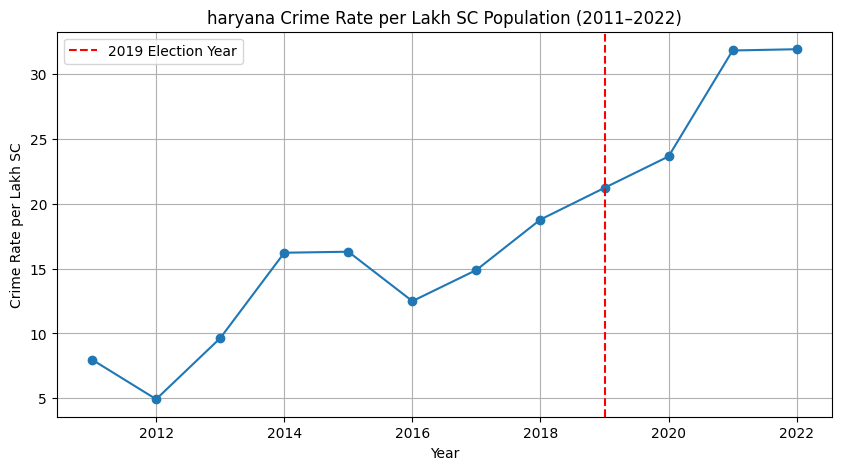

Average Crime Rate before 2019 : 12.659830667737012
Average Crime Rate in/after 2019 : 27.167669056039614
Difference (post - pre): 14.507838388302602
                              OLS Regression Results                              
Dep. Variable:     Crime_rate_per_lakh_SC   R-squared:                       0.890
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     36.32
Date:                    Tue, 25 Nov 2025   Prob (F-statistic):           4.90e-05
Time:                            18:12:34   Log-Likelihood:                -29.090
No. Observations:                      12   AIC:                             64.18
Df Residuals:                           9   BIC:                             65.63
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coe

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter MP data
mp = df_merged[df_merged["State/UT"] == "Haryana"].copy()
mp = mp.sort_values("Year")

BREAK_YEAR = 2019  # <-- changed here

# -------------------------------
# 1. LINE PLOT AROUND 2018
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(mp["Year"], mp["Crime_rate_per_lakh_SC"], marker="o")
plt.axvline(BREAK_YEAR, color='red', linestyle='--', label=f"{BREAK_YEAR} Election Year")
plt.title("haryana Crime Rate per Lakh SC Population (2011–2022)")
plt.ylabel("Crime Rate per Lakh SC")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 2. PRE vs POST BREAK YEAR
# -------------------------------
pre = mp[mp["Year"] < BREAK_YEAR]["Crime_rate_per_lakh_SC"]
post = mp[mp["Year"] >= BREAK_YEAR]["Crime_rate_per_lakh_SC"]

print("Average Crime Rate before", BREAK_YEAR, ":", pre.mean())
print("Average Crime Rate in/after", BREAK_YEAR, ":", post.mean())
print("Difference (post - pre):", post.mean() - pre.mean())

# -------------------------------
# 3. REGRESSION WITH PostBREAK DUMMY
#    Y = β0 + β1 * Year + β2 * PostBREAK
# -------------------------------
mp["PostBREAK"] = (mp["Year"] >= BREAK_YEAR).astype(int)
X = mp[["Year", "PostBREAK"]]
X = sm.add_constant(X)
y = mp["Crime_rate_per_lakh_SC"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation:
#  β1 → long-term yearly trend
#  β2 → shift after 2018 (if p < 0.05, significant)


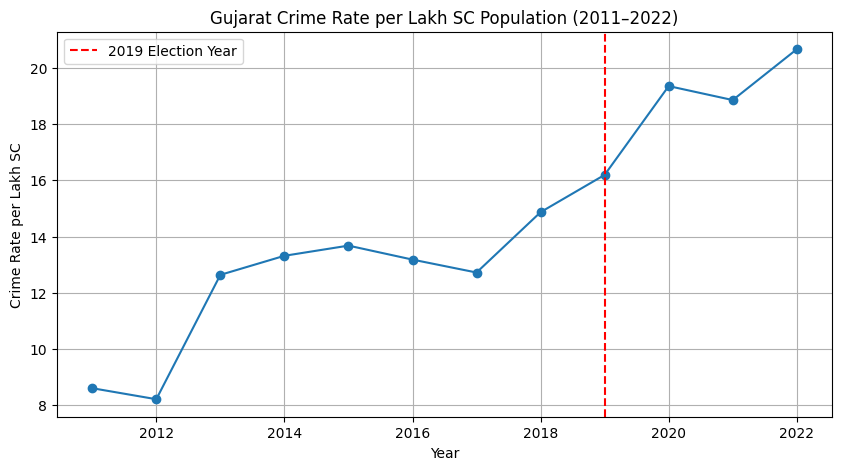

Average Crime Rate before 2019 : 12.154545025880735
Average Crime Rate in/after 2019 : 18.765208952343563
Difference (post - pre): 6.610663926462829
                              OLS Regression Results                              
Dep. Variable:     Crime_rate_per_lakh_SC   R-squared:                       0.904
Model:                                OLS   Adj. R-squared:                  0.882
Method:                     Least Squares   F-statistic:                     42.18
Date:                    Tue, 25 Nov 2025   Prob (F-statistic):           2.68e-05
Time:                            18:19:46   Log-Likelihood:                -18.820
No. Observations:                      12   AIC:                             43.64
Df Residuals:                           9   BIC:                             45.09
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter MP data
mp = df_merged[df_merged["State/UT"] == "Maharashtra"].copy()
mp = mp.sort_values("Year")

BREAK_YEAR = 2019  # <-- changed here

# -------------------------------
# 1. LINE PLOT AROUND 2018
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(mp["Year"], mp["Crime_rate_per_lakh_SC"], marker="o")
plt.axvline(BREAK_YEAR, color='red', linestyle='--', label=f"{BREAK_YEAR} Election Year")
plt.title("Maharashtra Crime Rate per Lakh SC Population (2011–2022)")
plt.ylabel("Crime Rate per Lakh SC")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 2. PRE vs POST BREAK YEAR
# -------------------------------
pre = mp[mp["Year"] < BREAK_YEAR]["Crime_rate_per_lakh_SC"]
post = mp[mp["Year"] >= BREAK_YEAR]["Crime_rate_per_lakh_SC"]

print("Average Crime Rate before", BREAK_YEAR, ":", pre.mean())
print("Average Crime Rate in/after", BREAK_YEAR, ":", post.mean())
print("Difference (post - pre):", post.mean() - pre.mean())

# -------------------------------
# 3. REGRESSION WITH PostBREAK DUMMY
#    Y = β0 + β1 * Year + β2 * PostBREAK
# -------------------------------
mp["PostBREAK"] = (mp["Year"] >= BREAK_YEAR).astype(int)
X = mp[["Year", "PostBREAK"]]
X = sm.add_constant(X)
y = mp["Crime_rate_per_lakh_SC"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation:
#  β1 → long-term yearly trend
#  β2 → shift after 2018 (if p < 0.05, significant)


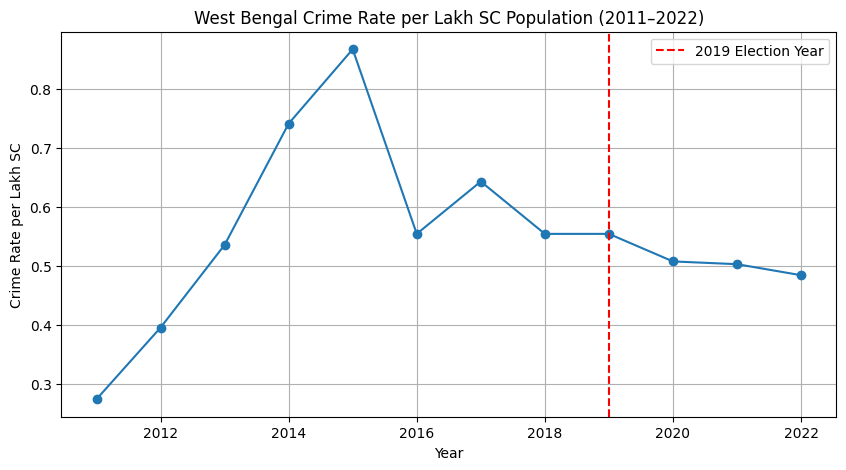

Average Crime Rate before 2019 : 0.5707424823896825
Average Crime Rate in/after 2019 : 0.5125034535744087
Difference (post - pre): -0.05823902881527376
                              OLS Regression Results                              
Dep. Variable:     Crime_rate_per_lakh_SC   R-squared:                       0.245
Model:                                OLS   Adj. R-squared:                  0.078
Method:                     Least Squares   F-statistic:                     1.463
Date:                    Tue, 25 Nov 2025   Prob (F-statistic):              0.282
Time:                            18:22:18   Log-Likelihood:                 7.8137
No. Observations:                      12   AIC:                            -9.627
Df Residuals:                           9   BIC:                            -8.173
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 c

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Filter MP data
mp = df_merged[df_merged["State/UT"] == "West Bengal"].copy()
mp = mp.sort_values("Year")

BREAK_YEAR = 2019  # <-- changed here

# -------------------------------
# 1. LINE PLOT AROUND 2018
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(mp["Year"], mp["Crime_rate_per_lakh_SC"], marker="o")
plt.axvline(BREAK_YEAR, color='red', linestyle='--', label=f"{BREAK_YEAR} Election Year")
plt.title("West Bengal Crime Rate per Lakh SC Population (2011–2022)")
plt.ylabel("Crime Rate per Lakh SC")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 2. PRE vs POST BREAK YEAR
# -------------------------------
pre = mp[mp["Year"] < BREAK_YEAR]["Crime_rate_per_lakh_SC"]
post = mp[mp["Year"] >= BREAK_YEAR]["Crime_rate_per_lakh_SC"]

print("Average Crime Rate before", BREAK_YEAR, ":", pre.mean())
print("Average Crime Rate in/after", BREAK_YEAR, ":", post.mean())
print("Difference (post - pre):", post.mean() - pre.mean())

# -------------------------------
# 3. REGRESSION WITH PostBREAK DUMMY
#    Y = β0 + β1 * Year + β2 * PostBREAK
# -------------------------------
mp["PostBREAK"] = (mp["Year"] >= BREAK_YEAR).astype(int)
X = mp[["Year", "PostBREAK"]]
X = sm.add_constant(X)
y = mp["Crime_rate_per_lakh_SC"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation:
#  β1 → long-term yearly trend
#  β2 → shift after 2018 (if p < 0.05, significant)
